<a href="https://colab.research.google.com/github/theniyazkhan/students_performance_prediction/blob/main/students_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Students Performance Prediction</center></h1>


<!-- <img src='plots\project.cover\inpt.png' width="242" height="42" style="float:right"> -->
<h3>Project Advisor:</h3>

<a href='https://www.linkedin.com/in/khuludbinteharun/' style="text-decoration: none">Khulud Binte Harun</a>
    
<h3>Working team:</h3>
<a href='https://www.linkedin.com/in/eshrath-esha-250b95282/' style="text-decoration: none">Eshrath Jahan Esha</a>
        
<a href='https://www.linkedin.com/in/theniyazkhan/' style="text-decoration: none">Niyaz Ahmad Khan</a>


  
    
    
    
    

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>Objectives :</span></h1>

In this notebook, we will  :

- **Predict whether or not a student will pass the final exam based on certain information given**
- **Compare the learning algorithms**
- **Find out what most affects student achievement**
- **Find the best algorithm with high accuracy**

We will be using,

**3 Classification Models (predicting Pass_Fail):**

  - *LogisticRegression*
  - *RandomForestClassifier*
  - *GradientBoostingClassifier*
  - *KNeighborsClassifier*

In [ ]:
!pip install numpy pandas scikit-learn matplotlib

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score, classification_report, roc_curve
)

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/Ai/student_performance_dataset.csv')
dfv = pd.read_csv('drive/MyDrive/Ai/student_performance_dataset.csv')
print("Shape:", df.shape)
print(df.head())
print(df.info())


Mounted at /content/drive
Shape: (708, 10)
  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31        68.267841                86   
1       S136    Male                    16        78.222927                73   
2       S209  Female                    21        87.525096                74   
3       S458  Female                    27        92.076483                99   
4       S078  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No               

In [ ]:
df = df.drop(columns=['Student_ID'])

In [ ]:
def numerical_data():
  df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
  df['Parental_Education_Level'] = df['Parental_Education_Level'].map({'High School': 0, 'Bachelors': 1, 'Masters': 2, 'PhD': 3, 'other': 4})
  df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].map({'No': 0, 'Yes': 1})
  df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})
  df['Pass_Fail'] = df['Pass_Fail'].map({'Fail': 0, 'Pass': 1})

  col = df['Pass_Fail']
  del df['Pass_Fail']
  df['Pass_Fail'] = col



In [ ]:
df

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,Male,16,78.222927,73,PhD,No,No,50,Fail
2,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...
703,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,Male,35,60.278990,83,Masters,No,No,62,Pass
705,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


In [ ]:
def feature_scaling(df_arg):
    for col_name in df_arg.columns:
        # Only attempt to scale numeric columns
        if pd.api.types.is_numeric_dtype(df_arg[col_name]):
            col = df_arg[col_name]
            # Scale columns with large values using a form of standardization
            if np.max(col) > 6:
                Max = col.max()
                mean = col.mean()
                if Max != 0: # Avoid division by zero
                    df_arg[col_name] = (col - mean) / Max
                else:
                    df_arg[col_name] = col # Keep as is if all zeros
            # Scale columns with smaller values using Min-Max scaling
            elif np.max(col) < 6:
                Min = col.min()
                Max_minus_Min = col.max() - Min
                if Max_minus_Min != 0: # Avoid division by zero
                    df_arg[col_name] = (col - Min) / Max_minus_Min
                else:
                    df_arg[col_name] = 0.0 # Scale to 0 if all values are the same


In [ ]:
numerical_data()

df

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,0,31,68.267841,86,0,1,1,63,1
1,0,16,78.222927,73,3,0,0,50,0
2,1,21,87.525096,74,3,1,0,55,0
3,1,27,92.076483,99,1,0,0,65,1
4,1,37,98.655517,63,2,0,1,70,1
...,...,...,...,...,...,...,...,...,...
703,0,14,84.658761,78,3,1,0,50,0
704,0,35,60.278990,83,2,0,0,62,1
705,0,25,98.384969,75,1,1,0,57,0
706,1,21,96.148012,84,1,1,0,65,1


In [ ]:
feature_scaling(df)

df

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,0.0,0.124801,-0.098431,0.081285,0.000000,1.0,1.0,0.054920,1.0
1,0.0,-0.259815,0.001152,-0.048715,1.000000,0.0,0.0,-0.113912,0.0
2,1.0,-0.131609,0.094204,-0.038715,1.000000,1.0,0.0,-0.048976,0.0
3,1.0,0.022237,0.139733,0.211285,0.333333,0.0,0.0,0.080894,1.0
4,1.0,0.278647,0.205544,-0.148715,0.666667,0.0,1.0,0.145829,1.0
...,...,...,...,...,...,...,...,...,...
703,0.0,-0.311097,0.065532,0.001285,1.000000,1.0,0.0,-0.113912,0.0
704,0.0,0.227365,-0.178345,0.051285,0.666667,0.0,0.0,0.041933,1.0
705,0.0,-0.029045,0.202838,-0.028715,0.333333,1.0,0.0,-0.023002,0.0
706,1.0,-0.131609,0.180461,0.061285,0.333333,1.0,0.0,0.080894,1.0


In [ ]:
df.shape

(708, 9)

In [ ]:
df.dropna().shape

(708, 9)

In [ ]:
df.columns

Index(['Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
       'Parental_Education_Level', 'Internet_Access_at_Home',
       'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

In [ ]:
features = ['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score']

In [ ]:
dfv['Pass_Fail'].value_counts()

,count
Pass_Fail,
Pass,354
Fail,354


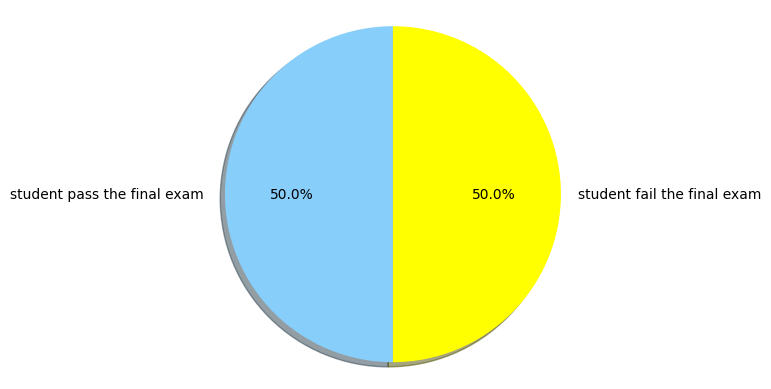

In [ ]:
labels = 'student pass the final exam ', 'student fail the final exam'
sizes = [354, 354]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

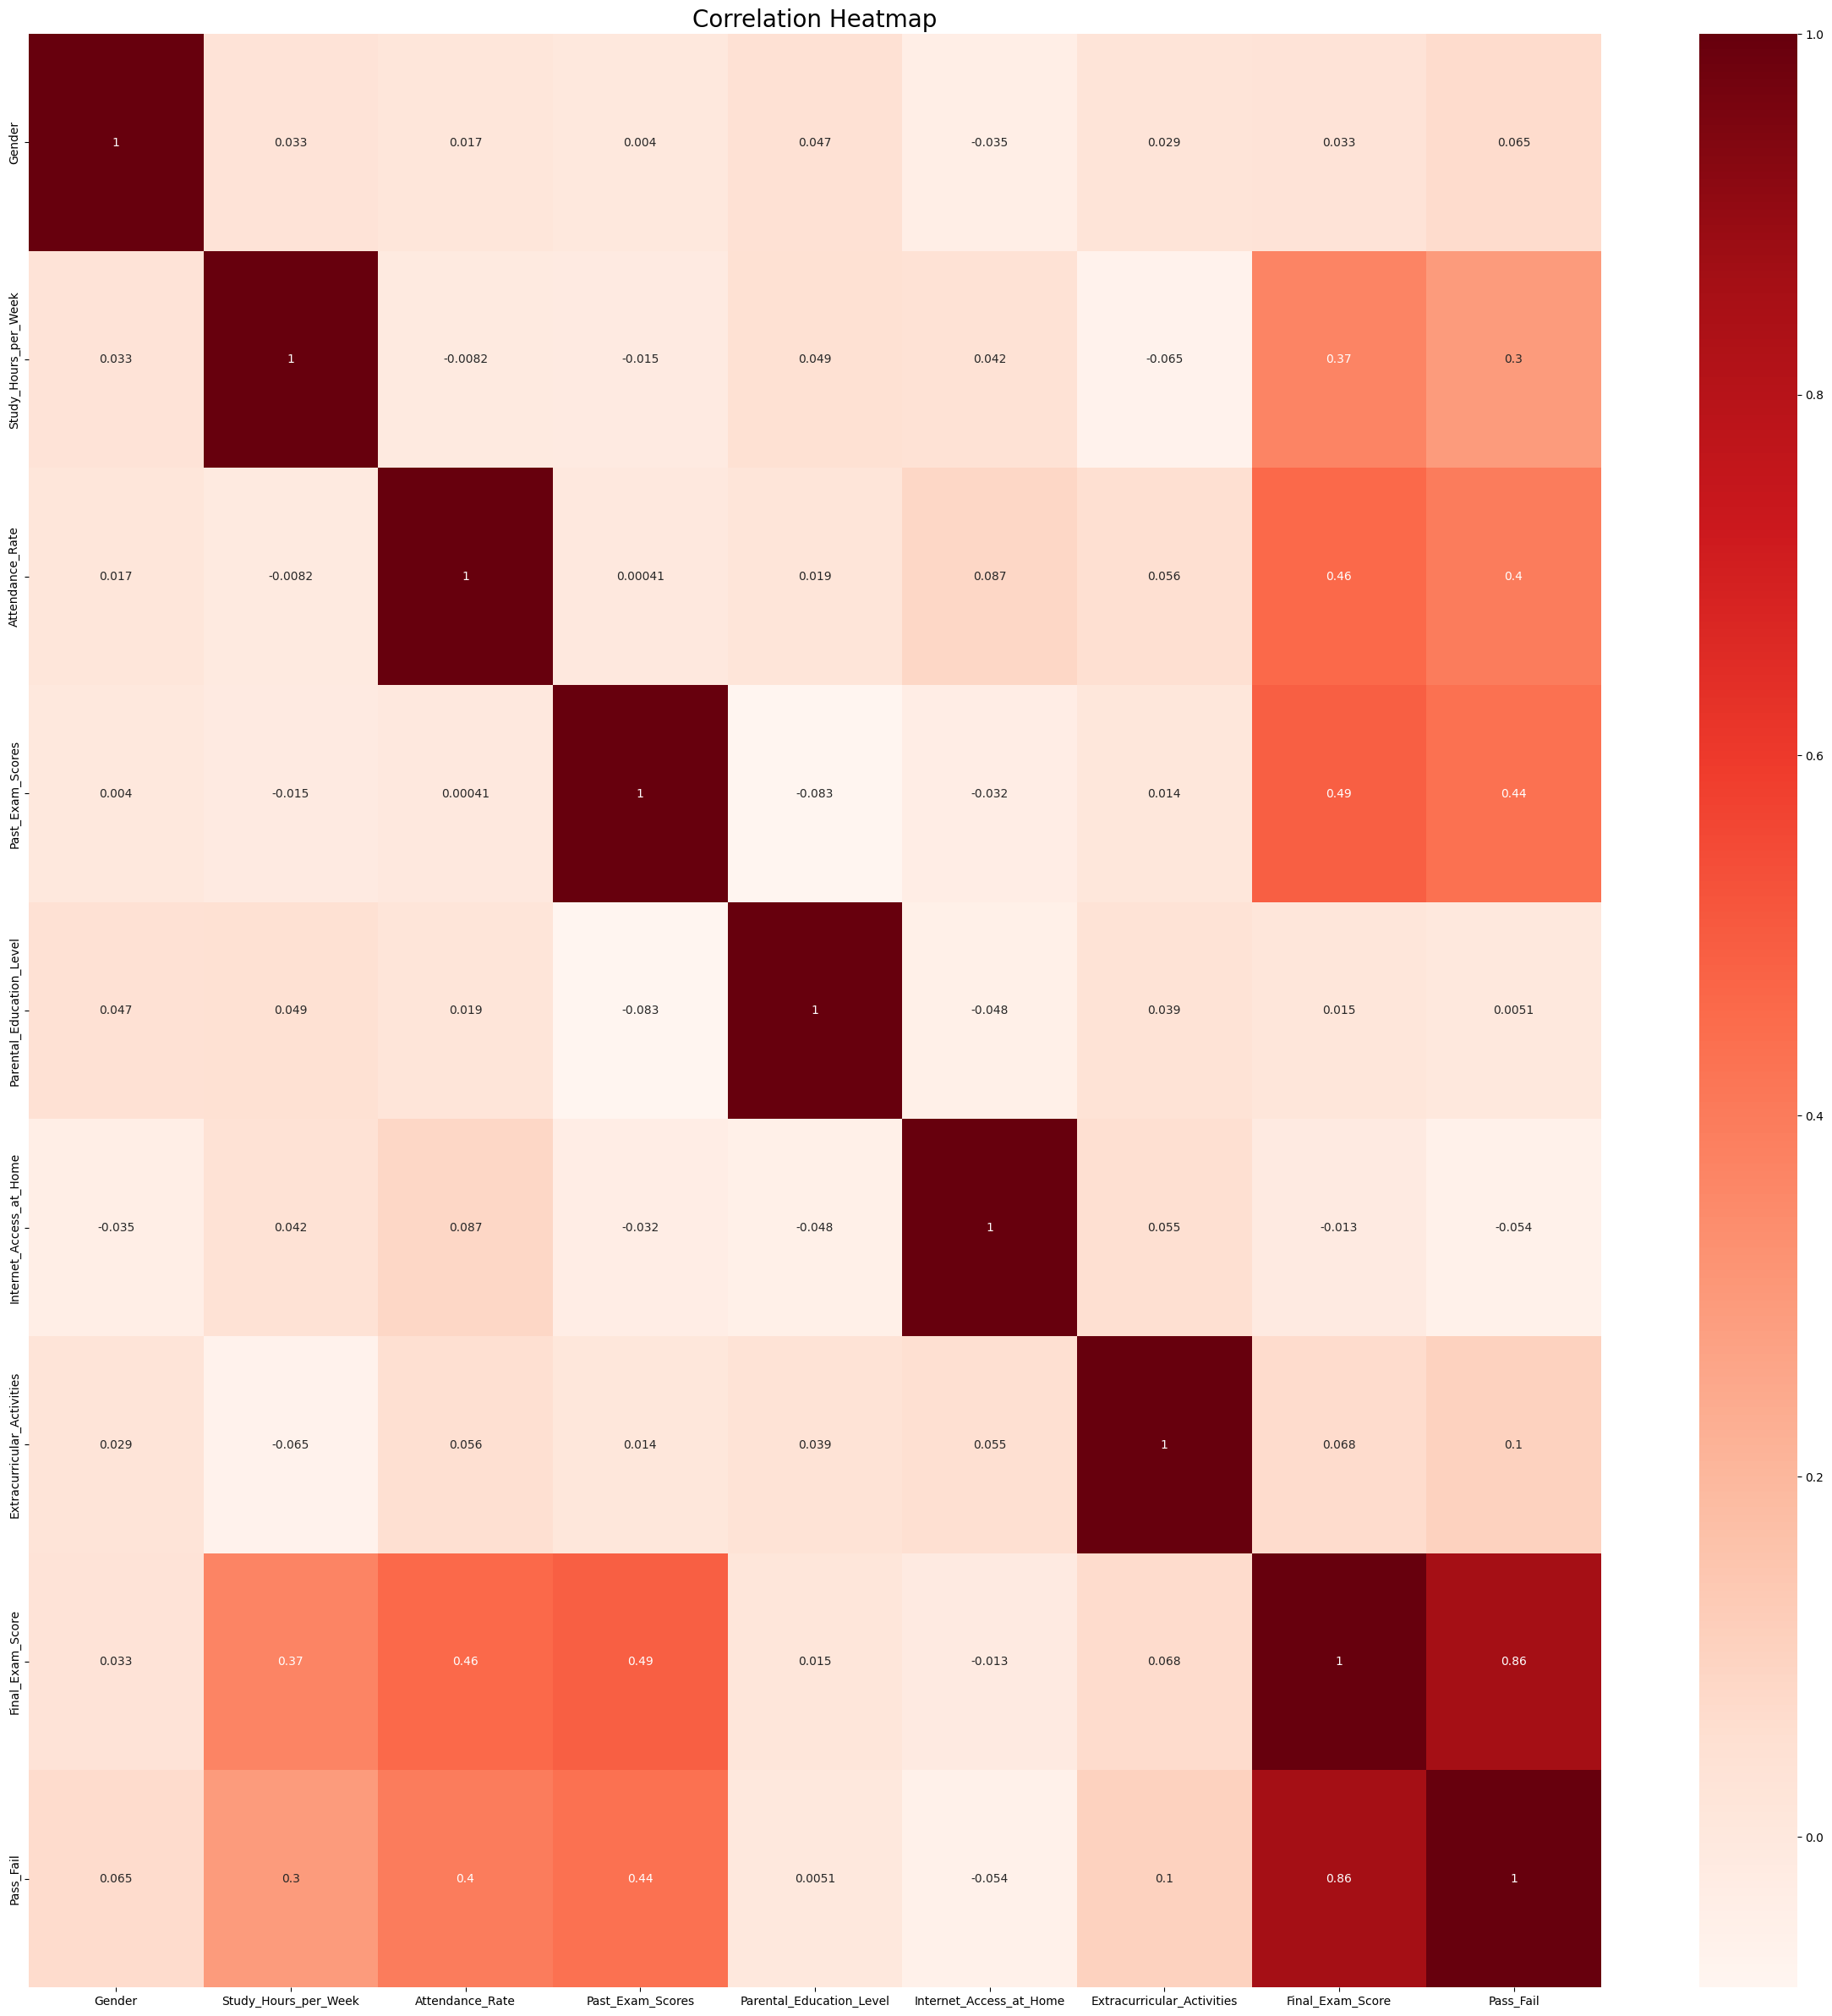

In [ ]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

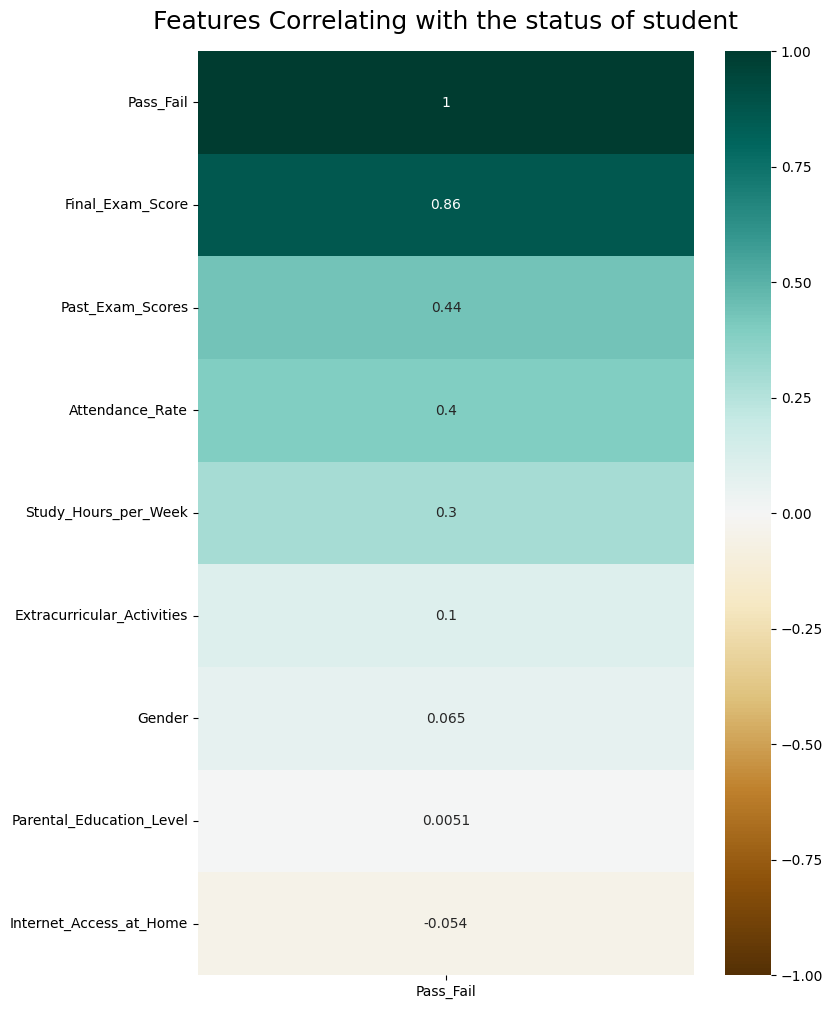

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Pass_Fail']].sort_values(by='Pass_Fail', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

In [ ]:
# split data train 70 % and test 30 %

data = df.to_numpy()
n = data.shape[1]
x = data[:,0:n-1]
y = data[:,n-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Once our data is split, we can forget about x_test and y_test until we define our model.
#x_train and y_train are the samples we will use to train the model

In [ ]:
logisticRegr = LogisticRegression(C=1)

In [ ]:

logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1)

In [ ]:
y_pred=logisticRegr.predict(x_test)
y_pred

array([1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0.])

In [ ]:
Sctest=logisticRegr.score(x_test,y_test)
Sctrain=logisticRegr.score(x_train,y_train)

print('#Accuracy test is: ',Sctest)
print('#Accuracy train is: ',Sctrain)


f1 = f1_score(y_test, y_pred, average='macro')

print('\n#f1 score is: ',f1)

#Accuracy test is:  0.9061032863849765
#Accuracy train is:  0.9191919191919192

#f1 score is:  0.9057522123893805


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 90,  18],
       [  2, 103]])

<Axes: >

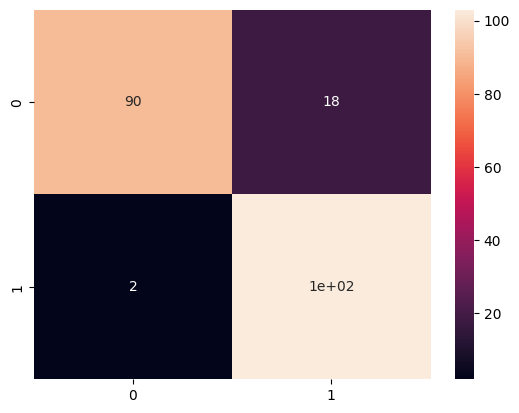

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       108
         1.0       0.85      0.98      0.91       105

    accuracy                           0.91       213
   macro avg       0.91      0.91      0.91       213
weighted avg       0.92      0.91      0.91       213



In [ ]:
print(df.columns)

Index(['Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
       'Parental_Education_Level', 'Internet_Access_at_Home',
       'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')


In [ ]:
results = {}
task_type = 'classification'

# Store predictions from the already trained LogisticRegression model
results['LogisticRegression'] = logisticRegr.predict(x_test)

# RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)
results['RandomForestClassifier'] = rf_classifier.predict(x_test)

# GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(x_train, y_train)
results['GradientBoostingClassifier'] = gb_classifier.predict(x_test)

# KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
results['KNeighborsClassifier'] = knn_classifier.predict(x_test)

print("Results dictionary and task_type have been updated.")

Results dictionary and task_type have been updated.



Model: LogisticRegression
Accuracy: 0.9061032863849765
Precision: 0.9156447849873225
Recall: 0.9061032863849765
F1: 0.9056711953134736


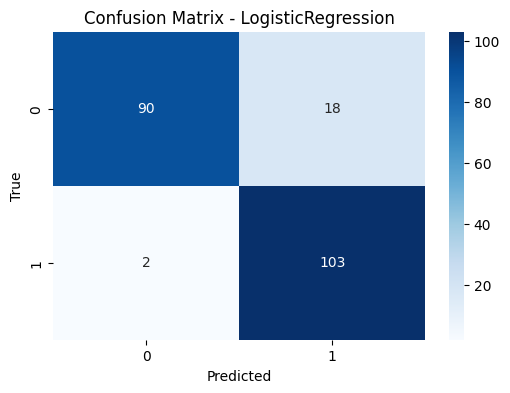


Model: RandomForestClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


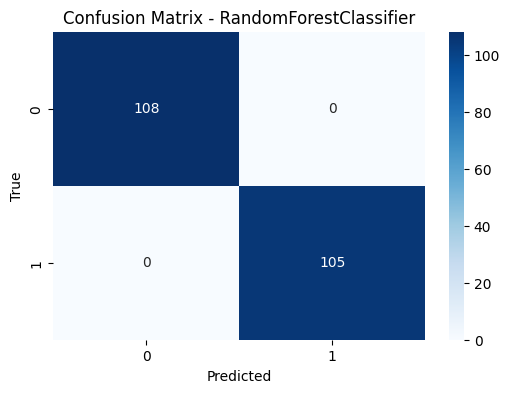


Model: GradientBoostingClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


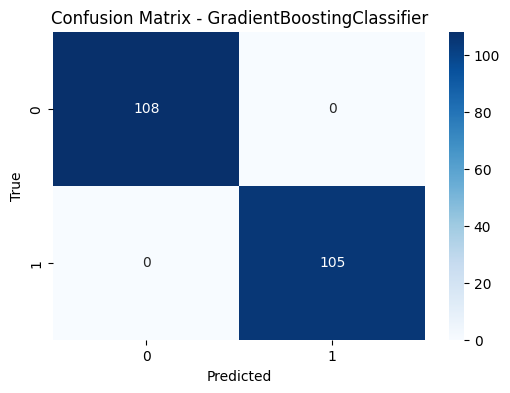


Model: KNeighborsClassifier
Accuracy: 0.755868544600939
Precision: 0.7608101676391263
Recall: 0.755868544600939
F1: 0.7550376516524892


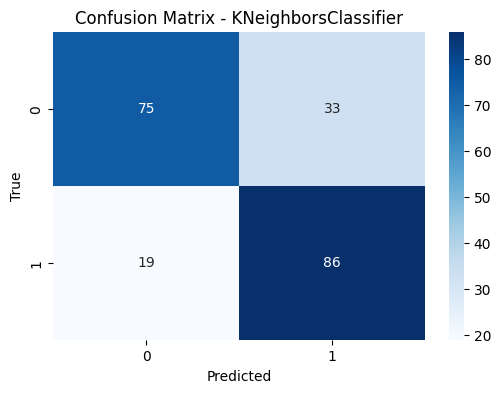

In [ ]:
if task_type == "classification":
    for name, preds in results.items():
        print("\nModel:", name)
        print("Accuracy:", accuracy_score(y_test, preds))
        print("Precision:", precision_score(y_test, preds, average='weighted'))
        print("Recall:", recall_score(y_test, preds, average='weighted'))
        print("F1:", f1_score(y_test, preds, average='weighted'))

        # Confusion Matrix
        cm = confusion_matrix(y_test, preds)
        plt.figure(figsize=(6, 4)) # Create a new figure for each heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Use 'Blues' cmap for a colored heatmap and fmt='d' for integer annotations
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

In [ ]:
model_accuracies = {}
for name, preds in results.items():
    model_accuracies[name] = accuracy_score(y_test, preds)

print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

Model Accuracies:
LogisticRegression: 0.9061
RandomForestClassifier: 1.0000
GradientBoostingClassifier: 1.0000
KNeighborsClassifier: 0.7559


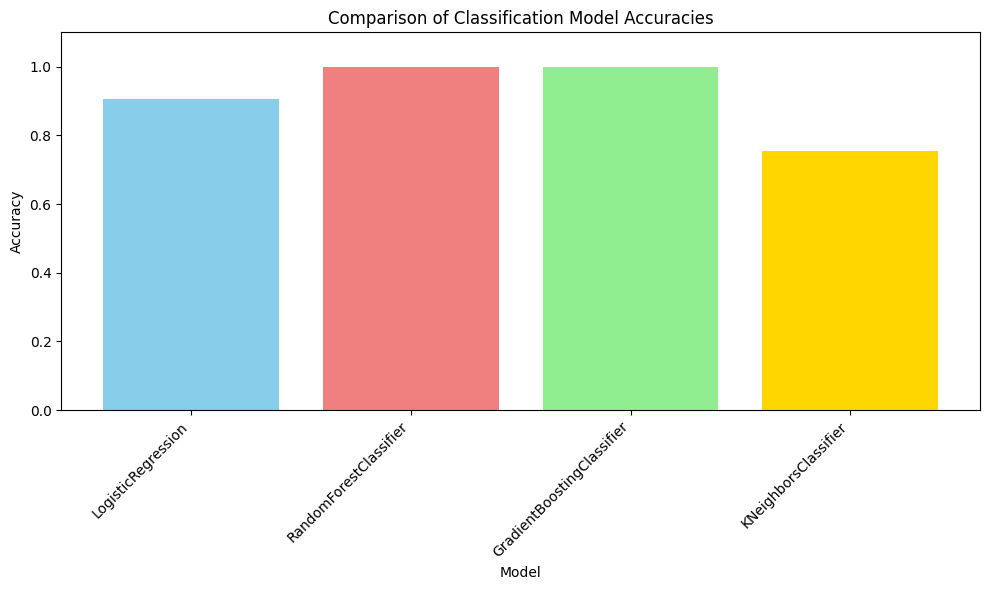

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
plt.ylim(0, 1.1) # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
feature_names = df.drop(columns=['Pass_Fail']).columns

# 2. Extract and print coefficients from LogisticRegression
logistic_coefficients = pd.Series(logisticRegr.coef_[0], index=feature_names)
print("\nLogistic Regression Coefficients (sorted):\n", logistic_coefficients.sort_values(ascending=False))

# 3. Extract and print feature importances from RandomForestClassifier
rf_importances = pd.Series(rf_classifier.feature_importances_, index=feature_names)
print("\nRandomForestClassifier Feature Importances (sorted):\n", rf_importances.sort_values(ascending=False))

# 4. Extract and print feature importances from GradientBoostingClassifier
gb_importances = pd.Series(gb_classifier.feature_importances_, index=feature_names)
print("\nGradientBoostingClassifier Feature Importances (sorted):\n", gb_importances.sort_values(ascending=False))


Logistic Regression Coefficients (sorted):
 Final_Exam_Score              7.683466
Past_Exam_Scores              3.826070
Attendance_Rate               3.617762
Study_Hours_per_Week          1.838481
Extracurricular_Activities    0.393966
Gender                        0.279218
Parental_Education_Level     -0.191669
Internet_Access_at_Home      -0.286550
dtype: float64

RandomForestClassifier Feature Importances (sorted):
 Final_Exam_Score              0.664599
Past_Exam_Scores              0.122127
Attendance_Rate               0.111789
Study_Hours_per_Week          0.062023
Parental_Education_Level      0.015485
Extracurricular_Activities    0.010055
Gender                        0.007334
Internet_Access_at_Home       0.006587
dtype: float64

GradientBoostingClassifier Feature Importances (sorted):
 Final_Exam_Score              1.000000e+00
Attendance_Rate               3.237499e-15
Past_Exam_Scores              1.559542e-15
Study_Hours_per_Week          4.166519e-16
Gender         